## Import Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## Read Car_Sales.csv Data

In [2]:
df = pd.read_csv("C:/Users/hp/Downloads/Car_sales.csv")

### Shape of Data

In [3]:
df.shape

(157, 16)

## Let's Explore the data

In [4]:
df.head(11)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [5]:
df.tail(11)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
146,Volkswagen,Jetta,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237
147,Volkswagen,Passat,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381
148,Volkswagen,Cabrio,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372
149,Volkswagen,GTI,5.596,13.760,Passenger,17.50,2.0,115.0,98.9,68.3,163.3,2.762,14.6,26.0,4/1/2011,47.946841
150,Volkswagen,Beetle,49.463,NaN,Passenger,15.90,2.0,115.0,98.9,67.9,161.1,2.769,14.5,26.0,10/20/2011,47.329632
151,Volvo,S40,16.957,NaN,Passenger,23.40,1.9,160.0,100.5,67.6,176.6,2.998,15.8,25.0,2/18/2011,66.113057
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [7]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [8]:
df.describe(include= 'object')

,Manufacturer,Model,Vehicle_type,Latest_Launch
count,157,157,157,157
unique,30,156,2,130
top,Dodge,Neon,Passenger,10/5/2012
freq,11,2,116,2


In [9]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [10]:
df.nunique()

Manufacturer            30
Model                  156
Sales_in_thousands     157
__year_resale_value    117
Vehicle_type             2
Price_in_thousands     152
Engine_size             31
Horsepower              66
Wheelbase               88
Width                   78
Length                 127
Curb_weight            147
Fuel_capacity           55
Fuel_efficiency         20
Latest_Launch          130
Power_perf_factor      154
dtype: int64

### Basic information about the dataset and data types

Prior to summary statistics, identify missing values or duplicates and drop them.

### Missing values

In [11]:
df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [12]:
df.dropna(subset=['__year_resale_value', 'Price_in_thousands', 'Engine_size', 
                  'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 
                  'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'], 
          inplace=True)

In [13]:
df.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

## Check Duplicates

In [14]:
df.duplicated().sum()

0

### Keep only numeric columns in a dataframe 

hint: (use function select_dtype)

In [15]:
numeric_df = df.select_dtypes(include='number')
numeric_df.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105


In [16]:
numeric_df.dtypes

Sales_in_thousands     float64
__year_resale_value    float64
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Power_perf_factor      float64
dtype: object

### Summary statistics

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,117.0,59.112316,75.058933,0.110000,16.767000,32.299000,76.029000,540.561000
__year_resale_value,117.0,18.031538,11.605632,5.160000,11.240000,14.010000,19.875000,67.550000
Price_in_thousands,117.0,25.969487,14.149699,9.235000,16.980000,21.665000,29.465000,82.600000
Engine_size,117.0,3.048718,1.055169,1.000000,2.200000,3.000000,3.800000,8.000000
Horsepower,117.0,181.282051,58.591786,55.000000,140.000000,175.000000,210.000000,450.000000
Wheelbase,117.0,107.326496,8.050588,92.600000,102.400000,107.000000,111.600000,138.700000
Width,117.0,71.189744,3.530151,62.600000,68.500000,70.400000,73.600000,79.300000
Length,117.0,187.717949,13.849926,149.400000,177.500000,187.800000,196.500000,224.500000
Curb_weight,117.0,3.324051,0.597177,1.895000,2.911000,3.340000,3.823000,5.115000
Fuel_capacity,117.0,17.812821,3.794609,10.300000,15.300000,17.200000,19.800000,32.000000


In [18]:
df.describe(include='object').T

,count,unique,top,freq
Manufacturer,117,26,Ford,10
Model,117,116,Neon,2
Vehicle_type,117,2,Passenger,88
Latest_Launch,117,108,9/25/2011,2


## Distribution

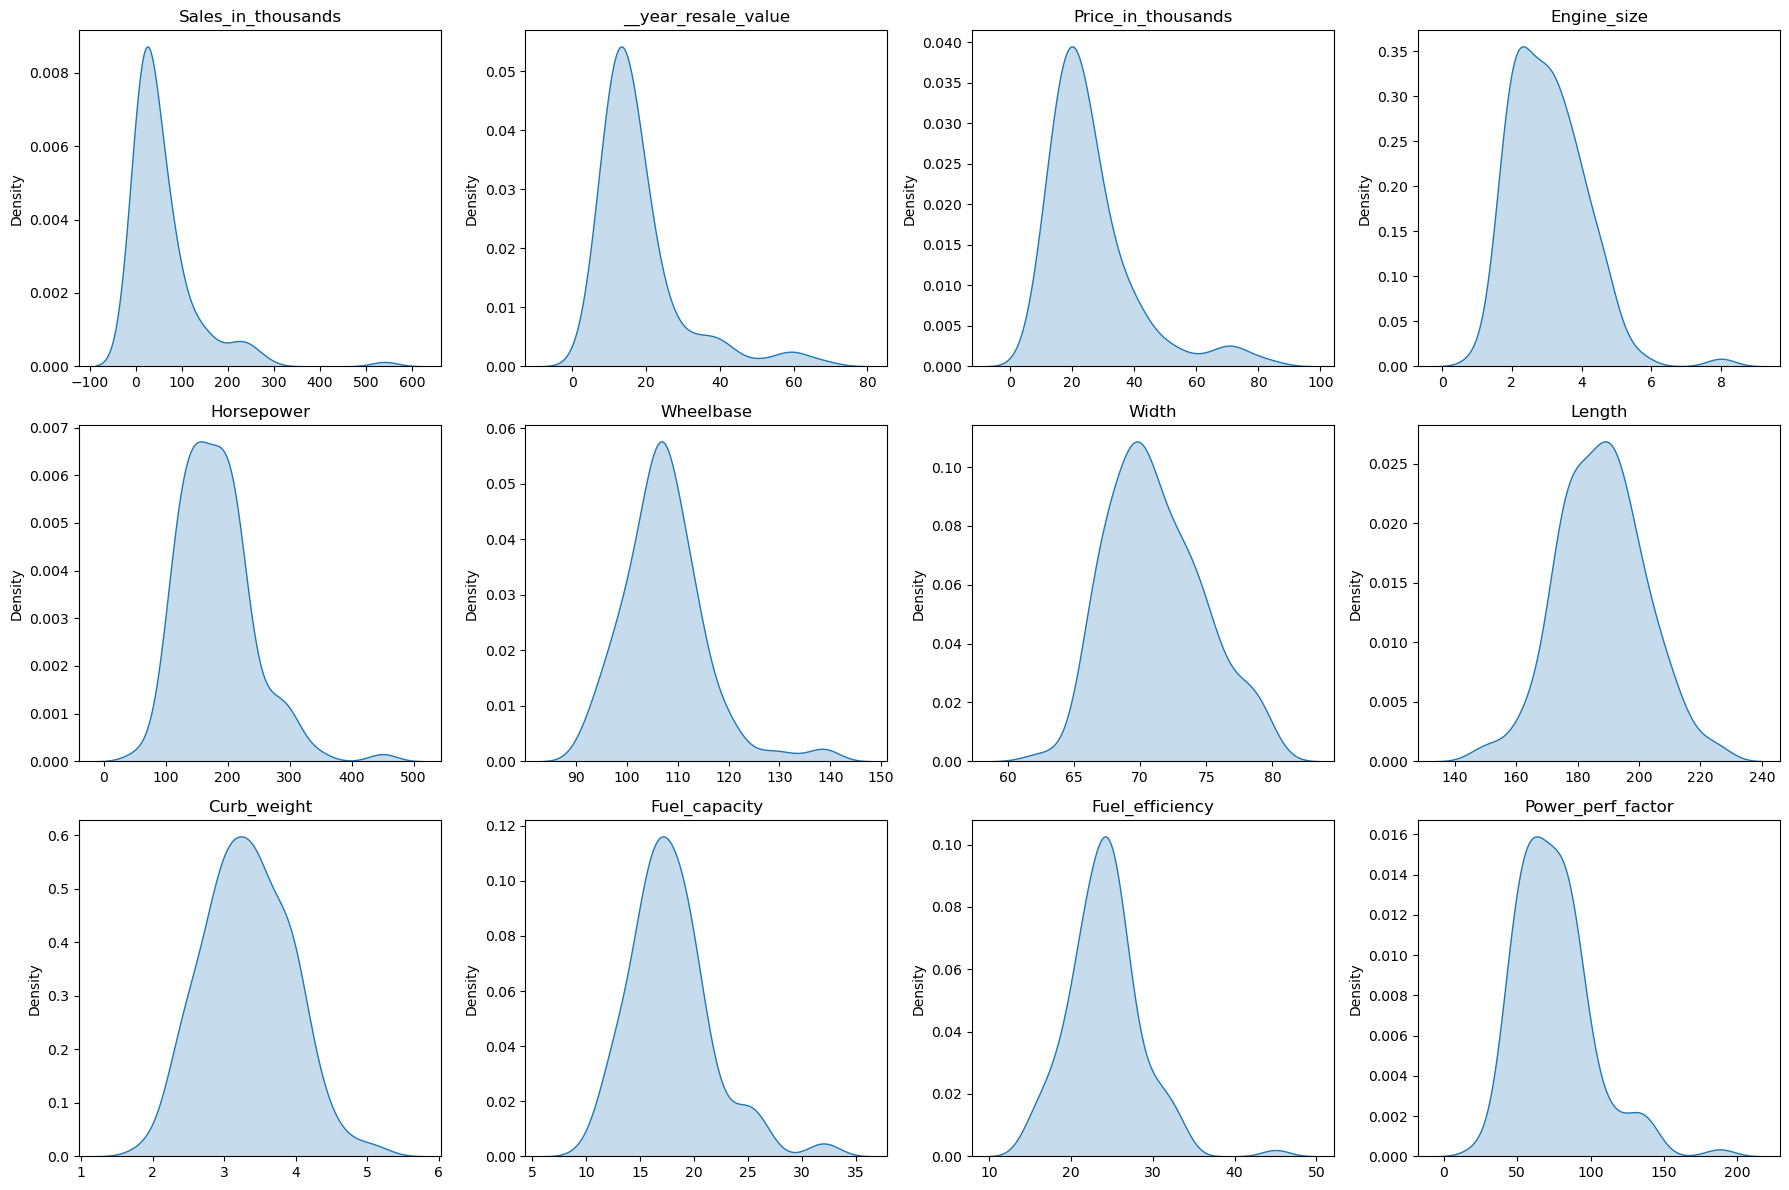

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_df.columns):
    ax = axes[i]
    sns.kdeplot(numeric_df[col], ax=ax, fill=True)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

## Normalized Distribution (Gaussian)

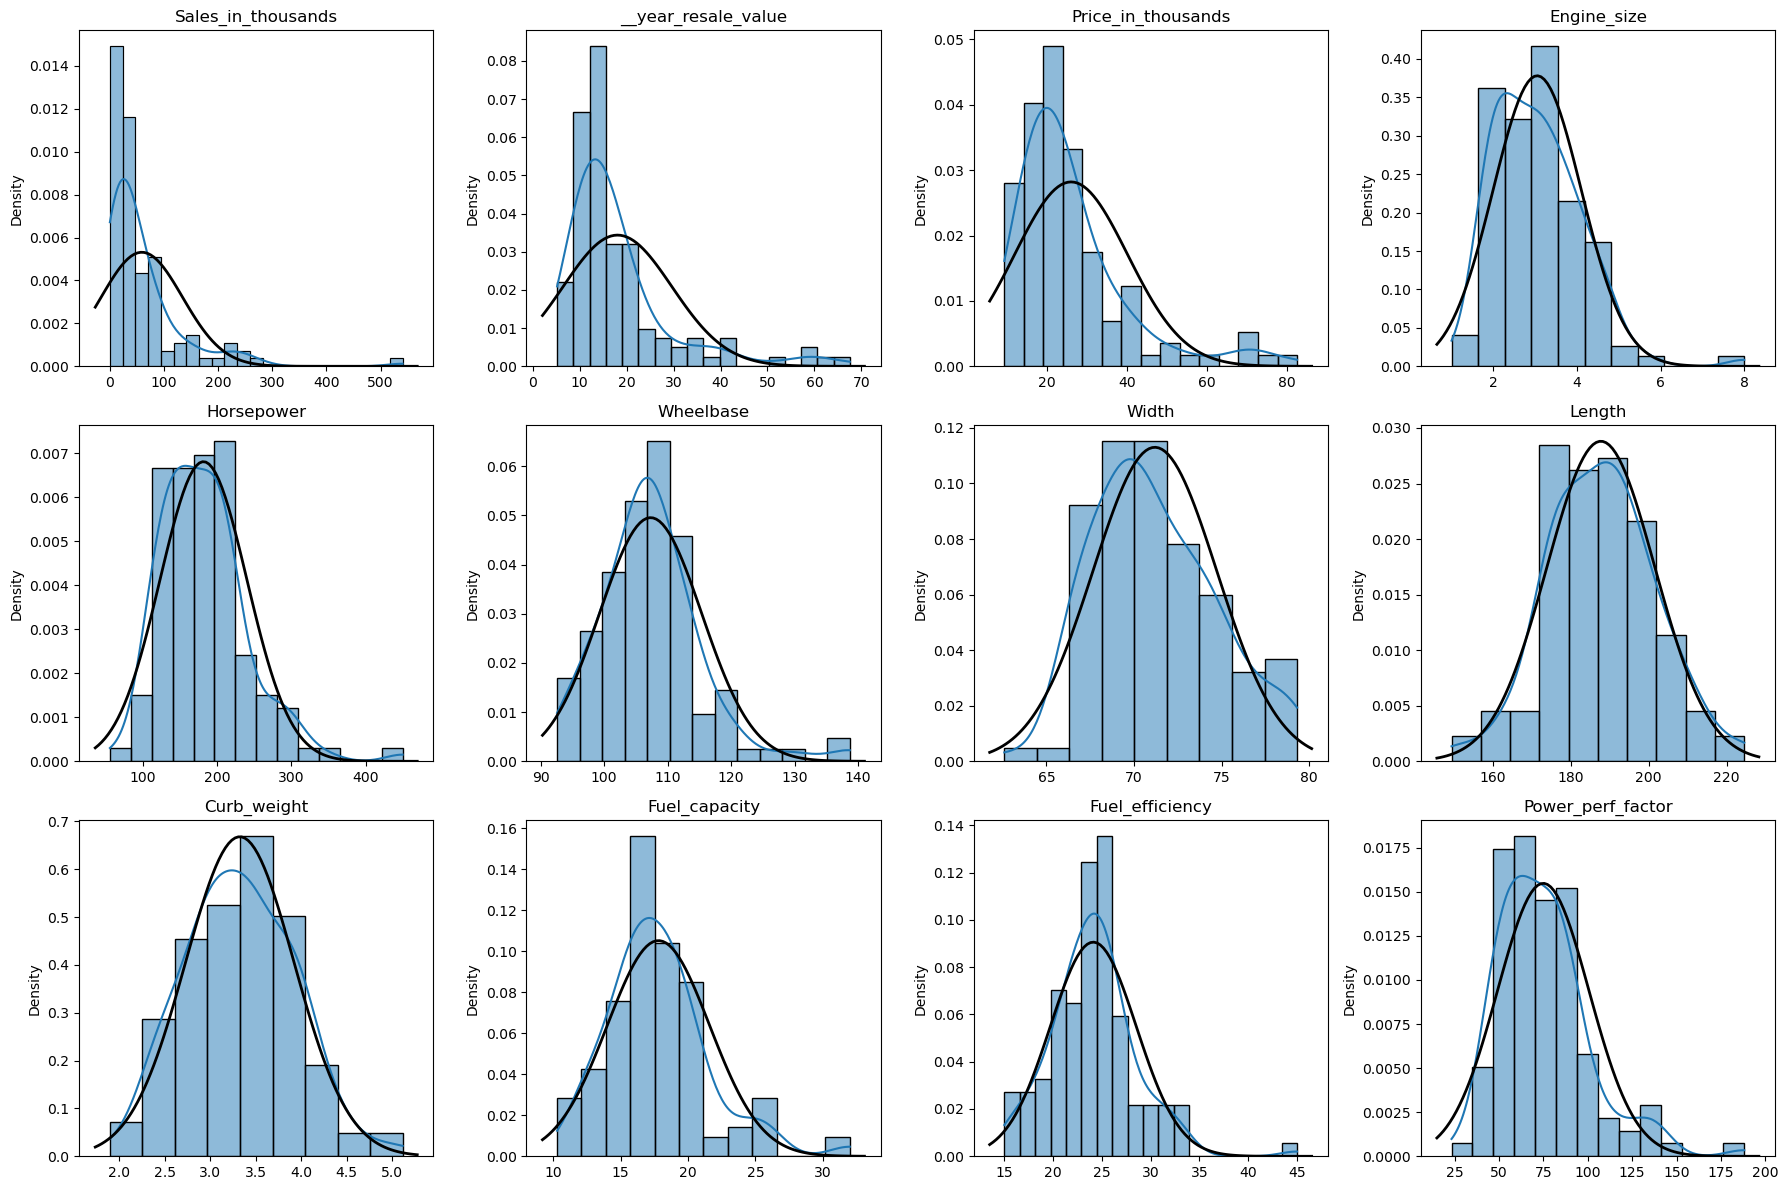

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_df.columns):
    ax = axes[i]
    sns.histplot(numeric_df[col], ax=ax, kde=True, stat="density")

    mu, std = numeric_df[col].mean(), numeric_df[col].std()
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2)
    
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

## Skewed Distribution (negative and positive)


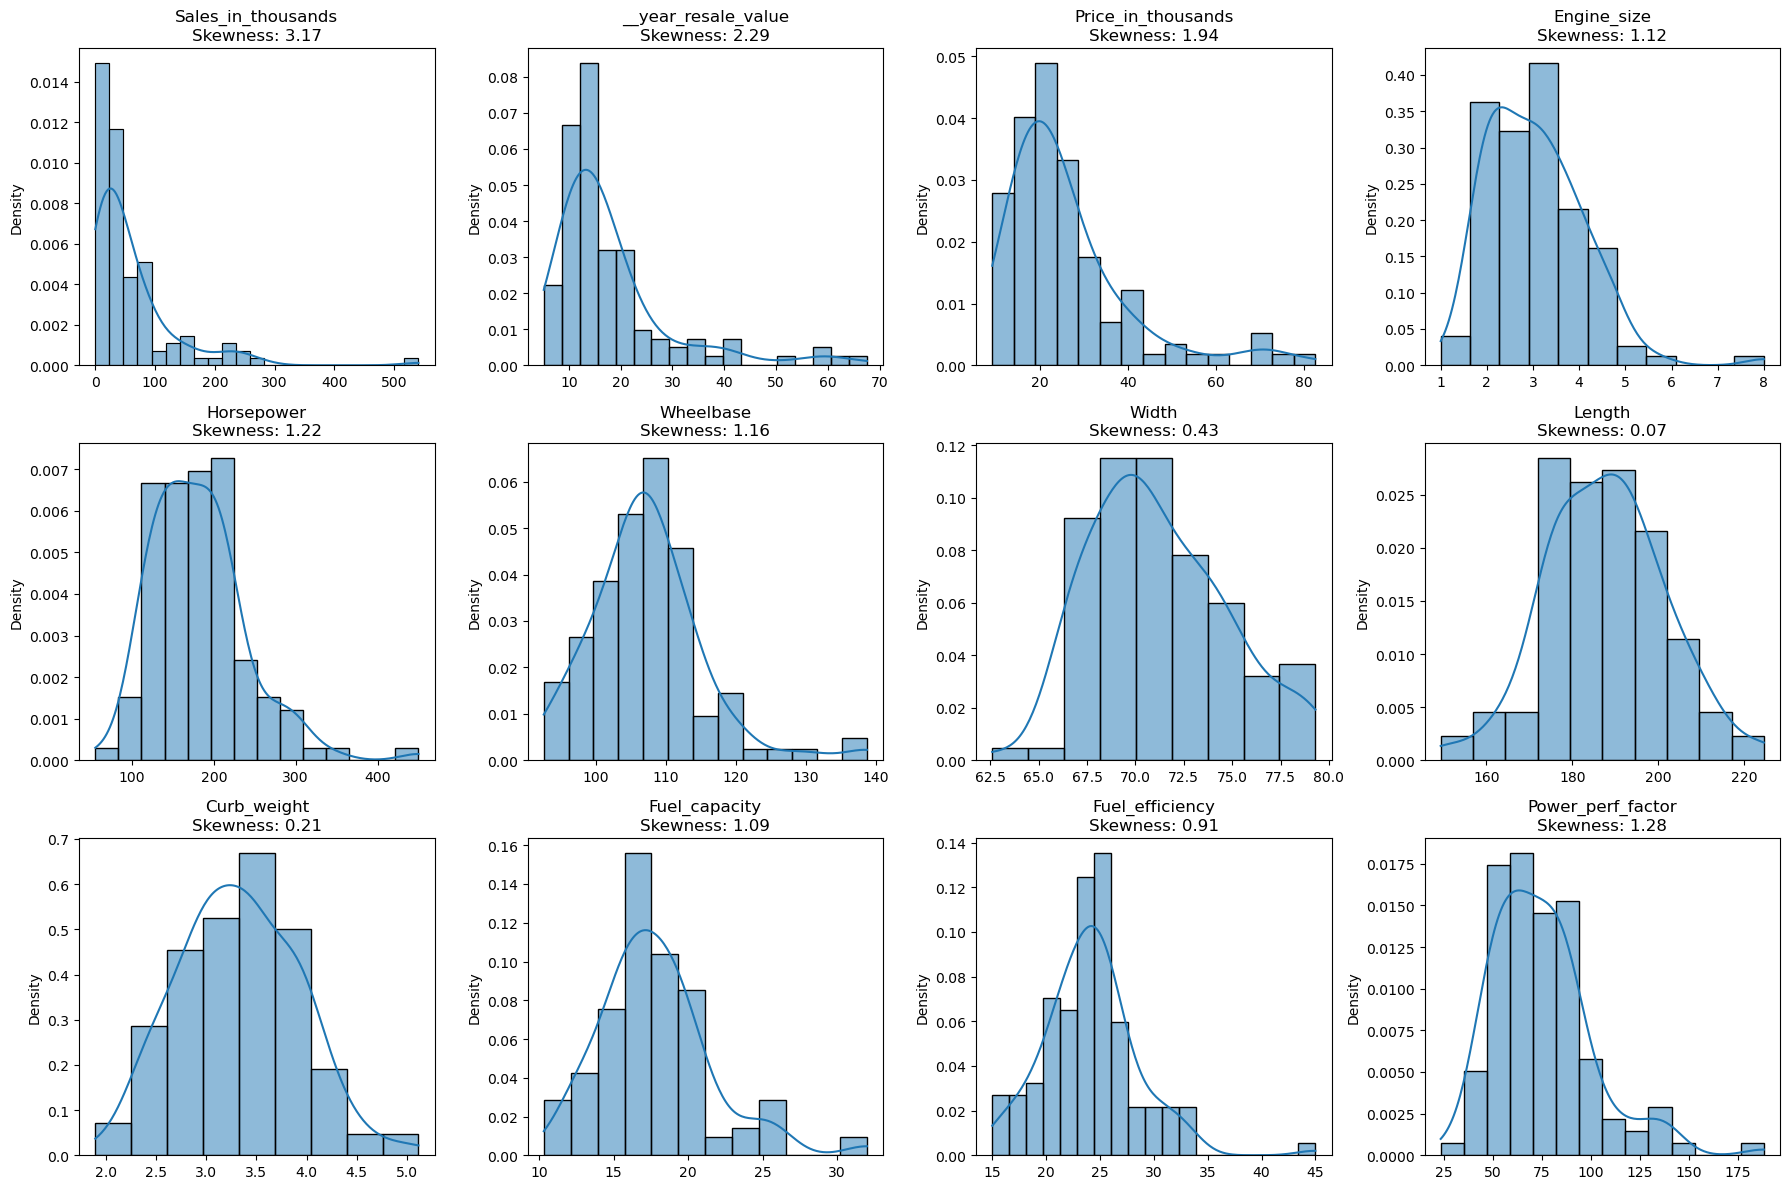

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_df.columns):
    ax = axes[i]
    sns.histplot(numeric_df[col], ax=ax, kde=True, stat="density")

    skewness = numeric_df[col].skew()
    
    ax.set_title(col + '\nSkewness: {:.2f}'.format(skewness))
    ax.set_xlabel('')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

## Outliers

Plot Boxplot

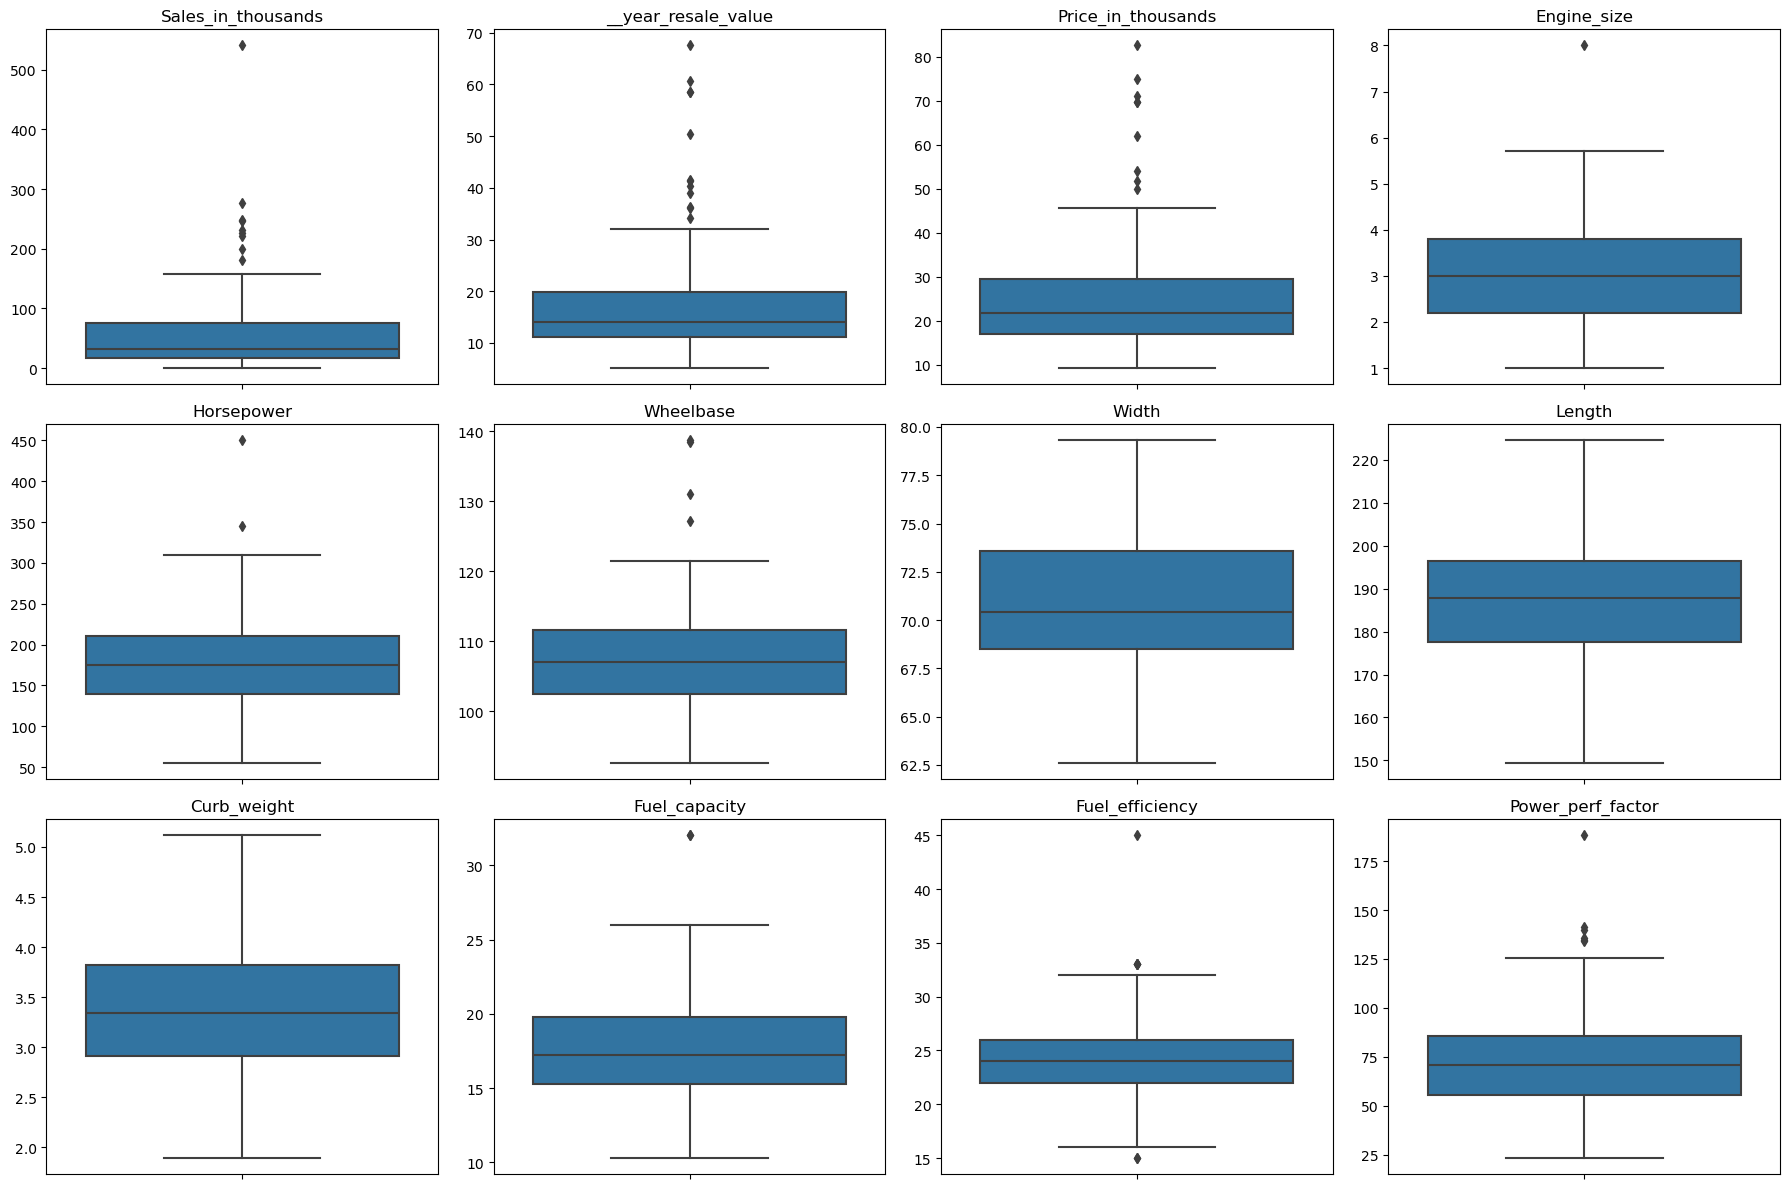

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_df.columns):
    ax = axes[i]
    sns.boxplot(y=numeric_df[col], ax=ax)
    ax.set_title(col)
    ax.set_ylabel('')
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

## Z-score

Detect Outliers using Z-Score. (Set threshold =3)

In [23]:
threshold = 3
z_scores = numeric_df.apply(lambda x: np.abs((x - x.mean()) / x.std()))

In [24]:
z_scores

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,0.562136,0.144028,0.315872,1.183429,0.704571,0.761000,1.101863,1.105995,1.147150,1.215625,0.881001,0.646085
1,0.262838,0.158842,0.171771,0.143372,0.746145,0.096080,0.252041,0.374157,0.323102,0.161498,0.199875,0.637901
3,0.673129,1.007568,1.132923,0.427687,0.490136,0.903475,0.059560,0.641307,0.880725,0.049328,0.481252,0.638638
4,0.515799,0.363915,0.139896,1.183429,0.533898,0.587099,0.846917,0.701661,0.545988,0.372323,0.653959,0.471573
5,0.537342,0.475929,0.564006,0.235714,0.319464,0.170609,1.390948,0.309175,0.396782,0.181094,0.481252,0.373827
...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.657501,0.569253,0.782313,0.993886,1.131252,1.046693,0.818589,1.763038,0.932808,0.873033,0.426917,1.085956
146,0.327858,0.412863,0.655101,0.993886,1.131252,1.046693,0.818589,1.113215,0.788797,0.873033,0.426917,1.059014
147,0.106720,0.112578,0.337073,1.183429,0.533898,0.115084,0.761935,0.261225,0.470633,0.372323,0.653959,0.513334
148,0.660059,0.125503,0.422588,0.993886,1.131252,1.233015,1.271828,1.972426,0.410350,1.083859,0.426917,1.009769


## Remove outliers

In [25]:
outliers = z_scores > threshold
cleaned_numeric_df = numeric_df[~outliers.any(axis=1)]
print("Shape of cleaned DataFrame after removing outliers:", cleaned_numeric_df.shape)

Shape of cleaned DataFrame after removing outliers: (107, 12)


In [26]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df < lower_bound) | (df > upper_bound)
    df_cleaned = df[~outliers.any(axis=1)]
    return df_cleaned

cleaned_numeric_df_iqr = remove_outliers_iqr(cleaned_numeric_df)

print("Shape of cleaned DataFrame after removing outliers using IQR method:", cleaned_numeric_df_iqr.shape)

Shape of cleaned DataFrame after removing outliers using IQR method: (88, 12)


In [27]:
lower_percentile = 0.01 
upper_percentile = 0.99
outliers_count_iqr = outliers.sum()
columns_with_remaining_outliers = cleaned_numeric_df_iqr.columns[outliers_count_iqr > 0]

for column in columns_with_remaining_outliers:
    lower_bound = cleaned_numeric_df_iqr[column].quantile(lower_percentile)
    upper_bound = cleaned_numeric_df_iqr[column].quantile(upper_percentile)

    cleaned_numeric_df_iqr[column] = cleaned_numeric_df_iqr[column].clip(lower=lower_bound, upper=upper_bound)

print("Winsorization completed.")

Winsorization completed.


In [28]:
z_scores_cleaned_iqr = cleaned_numeric_df_iqr.apply(lambda x: np.abs((x - x.mean()) / x.std()))

threshold = 3

outliers_cleaned_iqr = z_scores_cleaned_iqr > threshold

outliers_count_cleaned_iqr = outliers_cleaned_iqr.sum()

print("Number of remaining outliers in each numerical column after winsorization:")
print(outliers_count_cleaned_iqr)

Number of remaining outliers in each numerical column after winsorization:
Sales_in_thousands     0
__year_resale_value    0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Power_perf_factor      0
dtype: int64


## Distribution Check

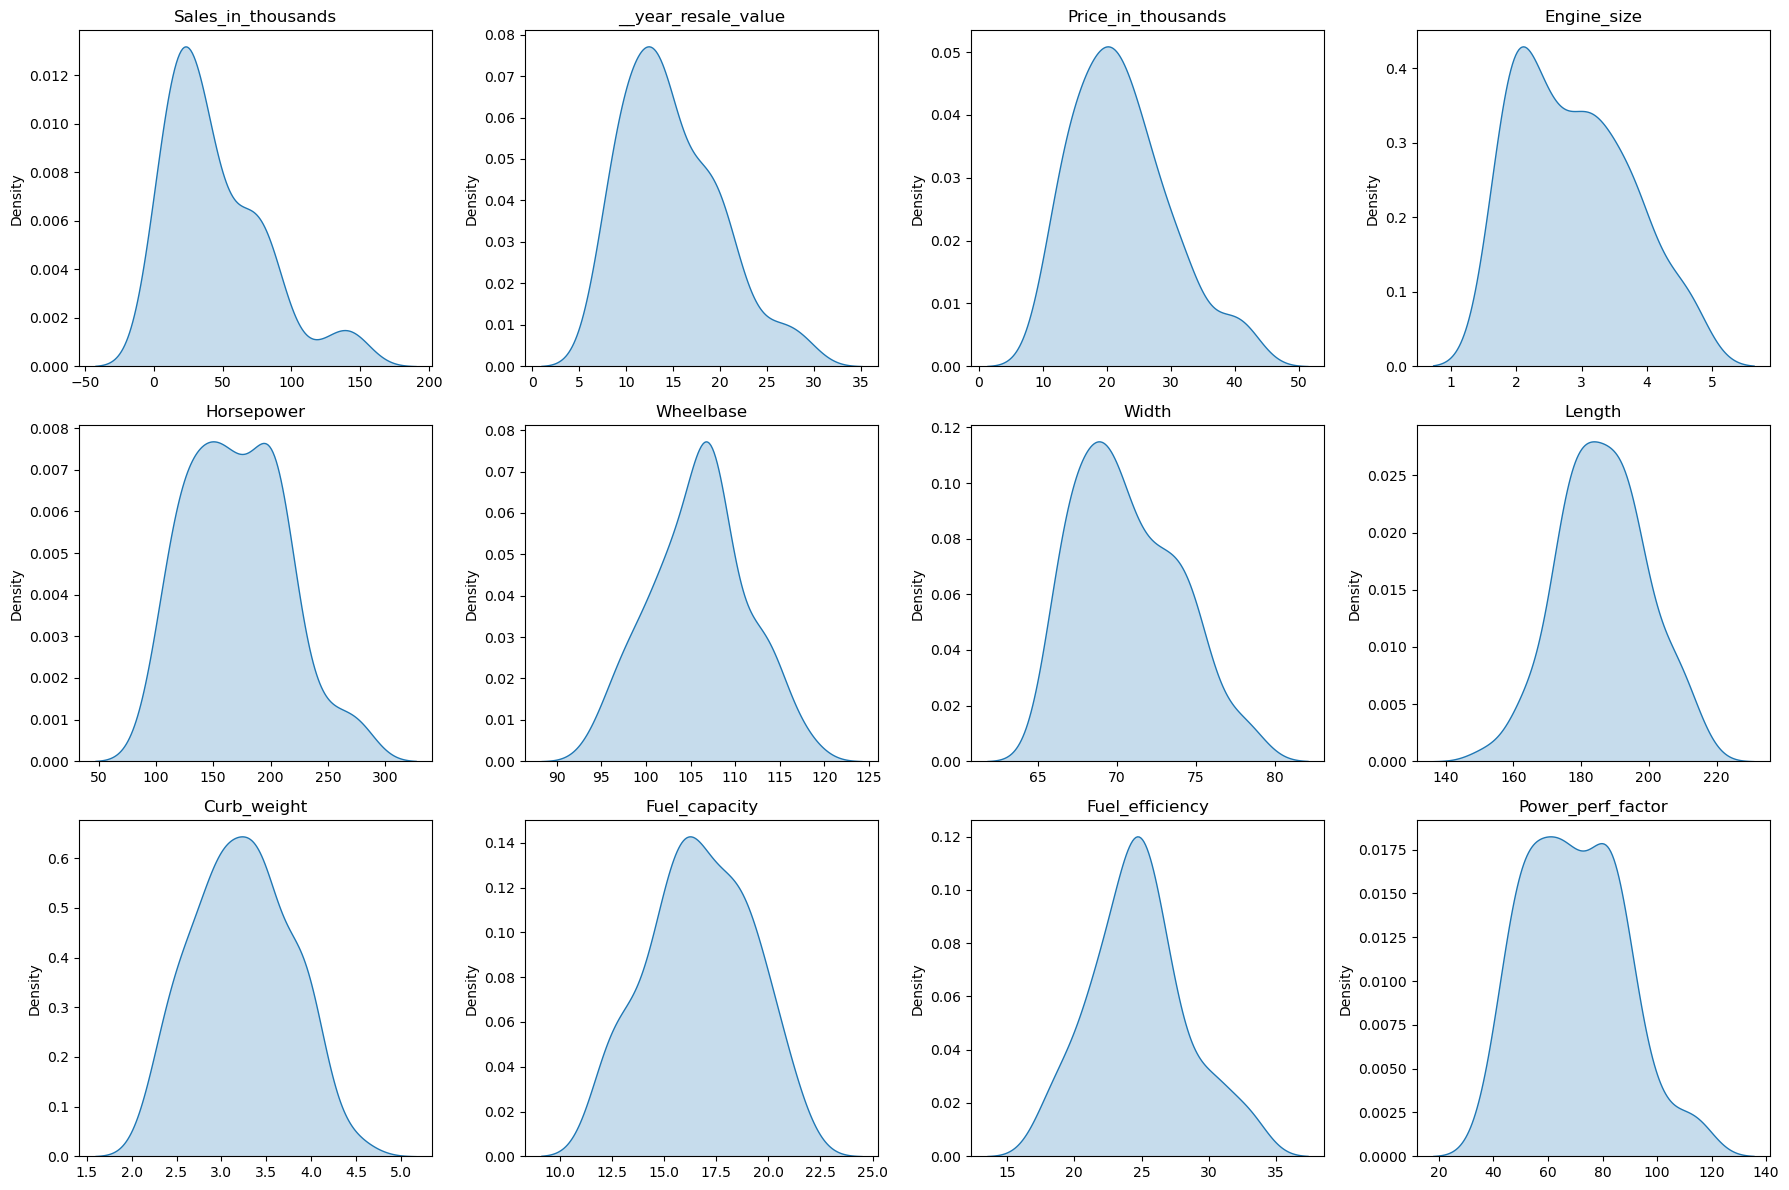

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(cleaned_numeric_df_iqr.columns):
    ax = axes[i]
    sns.kdeplot(cleaned_numeric_df_iqr[col], ax=ax, fill=True)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

#### Use binning technique to remove Skewness 

In [30]:
from scipy.stats import skew

skewness_before_binning = cleaned_numeric_df_iqr.apply(skew)
print("Skewness of each numerical column before binning:")
print(skewness_before_binning)

Skewness of each numerical column before binning:
Sales_in_thousands     1.129365
__year_resale_value    0.742693
Price_in_thousands     0.692604
Engine_size            0.447387
Horsepower             0.394322
Wheelbase              0.006408
Width                  0.492125
Length                 0.006888
Curb_weight            0.098827
Fuel_capacity         -0.092065
Fuel_efficiency        0.338140
Power_perf_factor      0.397161
dtype: float64


In [31]:
binned_numeric_df_iqr = cleaned_numeric_df_iqr.copy()
columns_to_bin = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Width', 'Power_perf_factor']

num_bins = 10 
def bin_column(column, num_bins):
    bin_edges = np.linspace(column.min(), column.max(), num_bins + 1)

    binned_column = np.digitize(column, bin_edges)

    return binned_column
for column in columns_to_bin:
    binned_numeric_df_iqr[column] = bin_column(cleaned_numeric_df_iqr[column], num_bins)
    skewness_after_binning = binned_numeric_df_iqr[columns_to_bin].skew()


In [32]:
binned_numeric_df_iqr = cleaned_numeric_df_iqr.copy()

columns_to_bin = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Width', 'Power_perf_factor']

num_bins = 10

def bin_column(column, num_bins):
    bin_edges = np.linspace(column.min(), column.max(), num_bins + 1)
    binned_column = np.digitize(column, bin_edges)

    return binned_column

for column in columns_to_bin:
    binned_numeric_df_iqr[column] = bin_column(cleaned_numeric_df_iqr[column], num_bins)


skewness_after_binning = binned_numeric_df_iqr[columns_to_bin].skew()


print("Skewness of each numerical column after selective binning:")
print(skewness_after_binning)

Skewness of each numerical column after selective binning:
Sales_in_thousands     1.178614
__year_resale_value    0.767203
Price_in_thousands     0.802381
Width                  0.575260
Power_perf_factor      0.386913
dtype: float64


In [33]:
columns_to_transform = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Width', 'Power_perf_factor']

for column in columns_to_transform:
    cleaned_numeric_df_iqr[column] = np.log(cleaned_numeric_df_iqr[column] + 1)
    
skewness_after_transformation = cleaned_numeric_df_iqr[columns_to_transform].skew()

print("Skewness of each numerical column after logarithmic transformation:")
print(skewness_after_transformation)

Skewness of each numerical column after logarithmic transformation:
Sales_in_thousands    -0.668329
__year_resale_value    0.123177
Price_in_thousands     0.016678
Width                  0.426437
Power_perf_factor     -0.086912
dtype: float64


## Distribution check
To confirm if skewness is removed or not

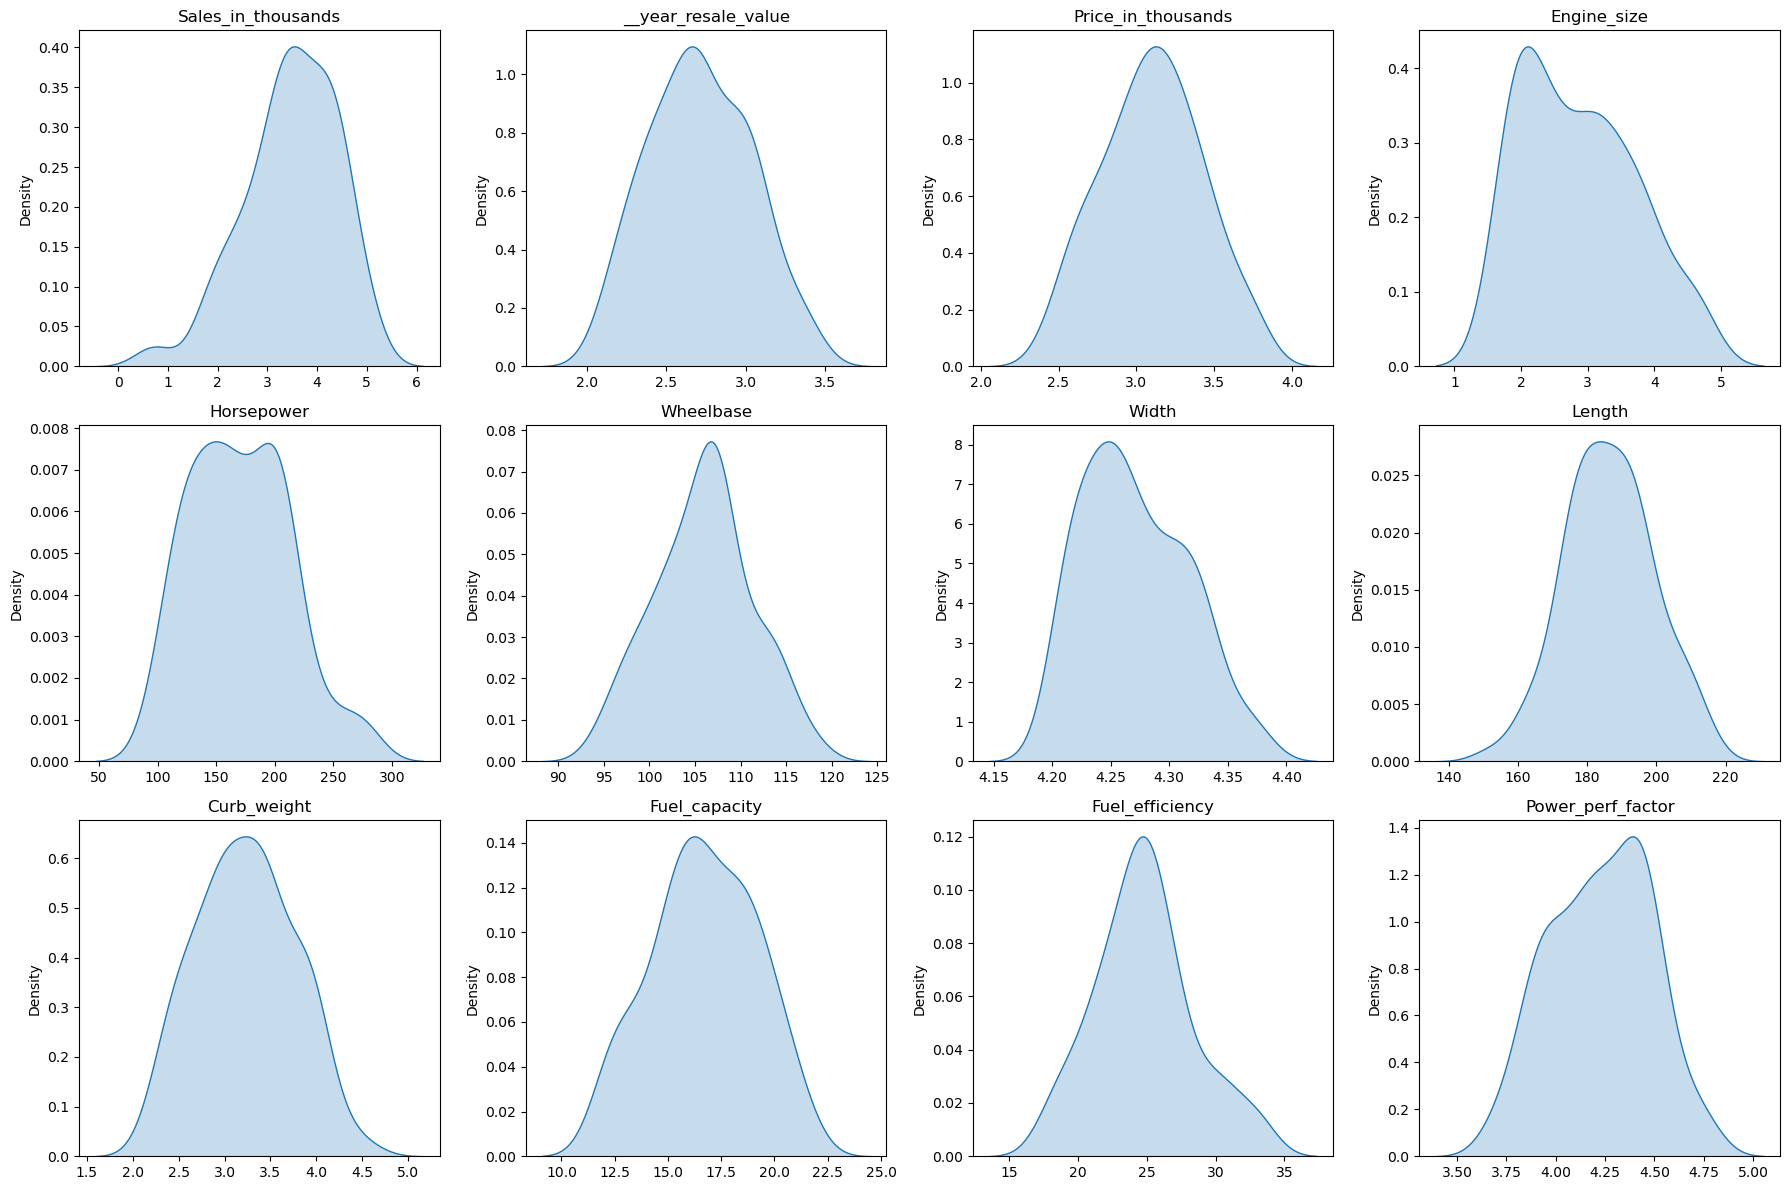

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(cleaned_numeric_df_iqr.columns):
    ax = axes[i]
    sns.kdeplot(cleaned_numeric_df_iqr[col], ax=ax, fill=True)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

### Standardization and Normalization

Apply standardization and normalization on the columns

## Standardization

In [46]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(cleaned_numeric_df_iqr)

standardized_df = pd.DataFrame(standardized_data, columns=cleaned_numeric_df_iqr.columns)

print(standardized_df)

    Sales_in_thousands  __year_resale_value  Price_in_thousands  Engine_size  \
0            -0.631137             0.454595            0.044020    -1.266172   
1             0.248286             1.039236            0.881915     0.392245   
2            -1.307934             2.169120            2.072932     0.747620   
3            -0.439154             1.381579            0.372815    -1.266172   
4            -0.524198             1.554055            1.423610    -0.081588   
..                 ...                  ...                 ...          ...   
83           -1.183023            -0.605900           -1.043593    -1.029255   
84            1.050172            -0.173581           -0.707640    -1.029255   
85            0.524015             0.520571            0.001971    -1.266172   
86           -1.202507             0.493623           -0.173597    -1.029255   
87           -1.712756            -0.059858           -0.569162    -1.029255   

    Horsepower  Wheelbase     Width    

In [47]:
mean_values = standardized_df.mean().round(3)
std_values = standardized_df.std()

print("Mean values after standardization:")
print(mean_values)
print("\nStandard deviation values after standardization:")
print(std_values)

Mean values after standardization:
Sales_in_thousands    -0.0
__year_resale_value   -0.0
Price_in_thousands    -0.0
Engine_size            0.0
Horsepower            -0.0
Wheelbase             -0.0
Width                 -0.0
Length                 0.0
Curb_weight            0.0
Fuel_capacity          0.0
Fuel_efficiency        0.0
Power_perf_factor     -0.0
dtype: float64

Standard deviation values after standardization:
Sales_in_thousands     1.005731
__year_resale_value    1.005731
Price_in_thousands     1.005731
Engine_size            1.005731
Horsepower             1.005731
Wheelbase              1.005731
Width                  1.005731
Length                 1.005731
Curb_weight            1.005731
Fuel_capacity          1.005731
Fuel_efficiency        1.005731
Power_perf_factor      1.005731
dtype: float64


## Normalization

In [49]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(cleaned_numeric_df_iqr)
normalized_df = pd.DataFrame(normalized_data, columns=cleaned_numeric_df_iqr.columns)

print(normalized_df)

    Sales_in_thousands  __year_resale_value  Price_in_thousands  Engine_size  \
0             0.510482             0.580226            0.505517     0.013737   
1             0.698867             0.723366            0.708470     0.506869   
2             0.365502             1.000000            0.996955     0.612540   
3             0.551607             0.807183            0.585157     0.013737   
4             0.533390             0.849411            0.839678     0.365974   
..                 ...                  ...                 ...          ...   
83            0.392260             0.320581            0.242078     0.084185   
84            0.870643             0.426427            0.323452     0.084185   
85            0.757932             0.596379            0.495332     0.013737   
86            0.388086             0.589782            0.452806     0.084185   
87            0.278783             0.454271            0.356993     0.084185   

    Horsepower  Wheelbase     Width    

In [51]:
min_values = normalized_df.min()
max_values = normalized_df.max()

print("Minimum values after normalization:")
print(min_values)
print("\nMaximum values after normalization:")
print(max_values)

Minimum values after normalization:
Sales_in_thousands     0.0
__year_resale_value    0.0
Price_in_thousands     0.0
Engine_size            0.0
Horsepower             0.0
Wheelbase              0.0
Width                  0.0
Length                 0.0
Curb_weight            0.0
Fuel_capacity          0.0
Fuel_efficiency        0.0
Power_perf_factor      0.0
dtype: float64

Maximum values after normalization:
Sales_in_thousands     1.0
__year_resale_value    1.0
Price_in_thousands     1.0
Engine_size            1.0
Horsepower             1.0
Wheelbase              1.0
Width                  1.0
Length                 1.0
Curb_weight            1.0
Fuel_capacity          1.0
Fuel_efficiency        1.0
Power_perf_factor      1.0
dtype: float64


## Distribution check

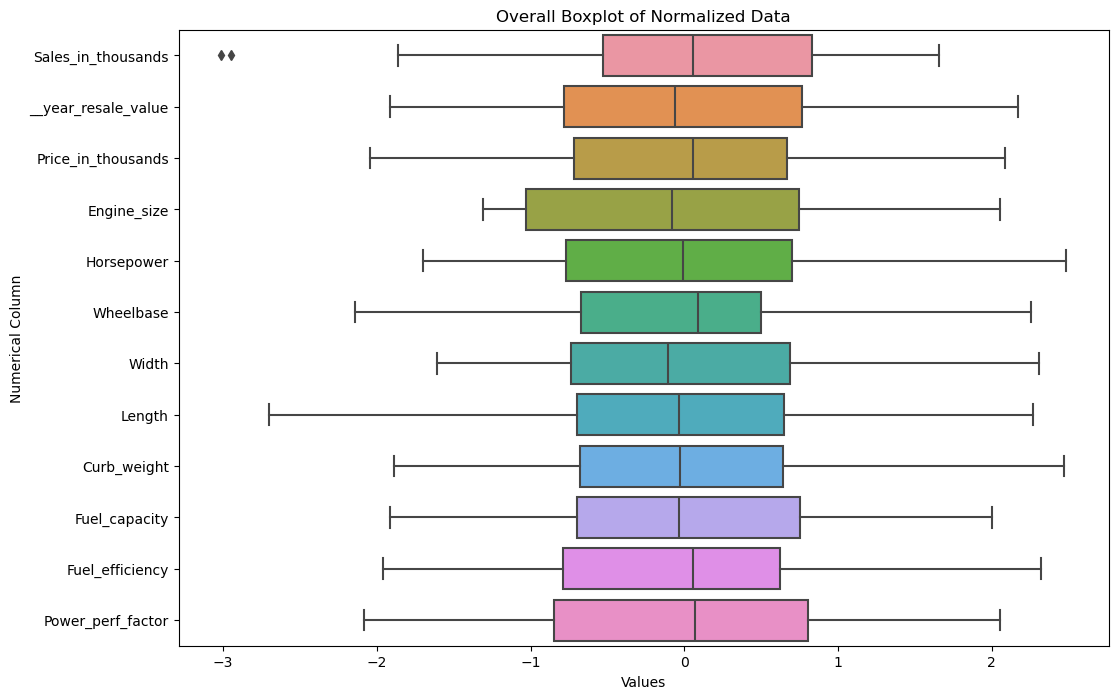

In [59]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=standardized_df, orient='h')
plt.xlabel('Values')
plt.ylabel('Numerical Column')
plt.title('Overall Boxplot of Normalized Data')
plt.show()

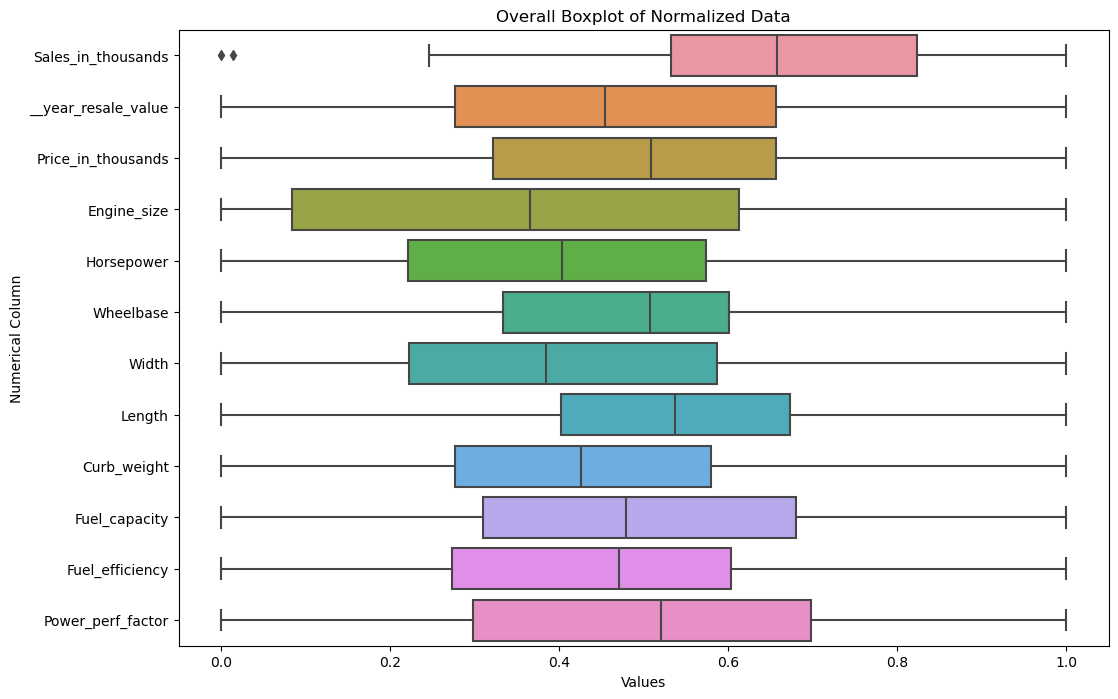

In [58]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=normalized_df, orient='h')
plt.xlabel('Values')
plt.ylabel('Numerical Column')
plt.title('Overall Boxplot of Normalized Data')
plt.show()

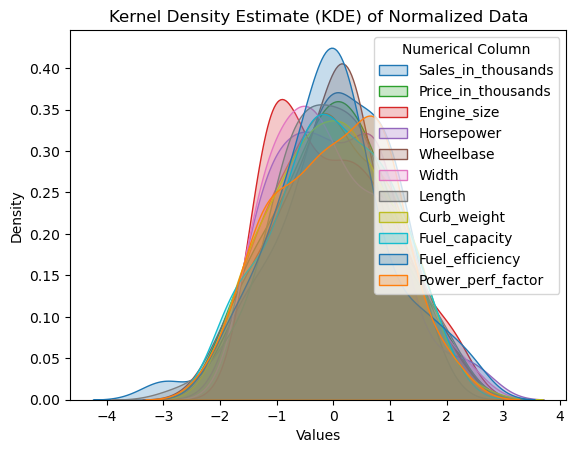

In [61]:
for column in normalized_df.columns:
    sns.kdeplot(standardized_df[column], label=column, shade=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) of Normalized Data')
plt.legend(title='Numerical Column')
plt.show()

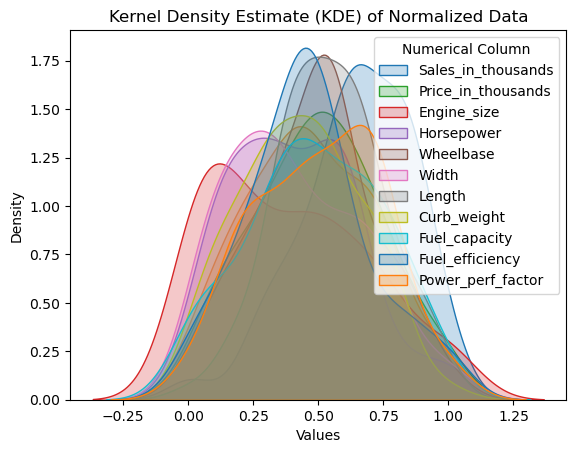

In [60]:
for column in normalized_df.columns:
    sns.kdeplot(normalized_df[column], label=column, shade=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) of Normalized Data')
plt.legend(title='Numerical Column')
plt.show()

## The END!